**POZNÁMKA: Tento notebook je určený pre platformu Google Colab. Je však možné ho spustiť (možno s drobnými úpravami) aj ako štandardný Jupyter notebook.** 



In [ ]:
#@title -- Installation of Packages -- { display-mode: "form" }
import sys
!{sys.executable} -m pip install umap-learn
!{sys.executable} -m pip install git+https://github.com/michalgregor/class_utils.git

In [ ]:
#@title -- Import of Necessary Packages -- { display-mode: "form" }
import pandas as pd
import numpy as np
import numbers
from umap import UMAP
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
#@title -- Downloading Data -- { display-mode: "form" }
DATA_HOME = "https://github.com/michalgregor/ml_notebooks/blob/main/data/{}?raw=1"

from class_utils.download import download_file_maybe_extract
download_file_maybe_extract(DATA_HOME.format("iris.csv"), directory="data")

# also create a directory for storing any outputs
import os
os.makedirs("output", exist_ok=True)

In [ ]:
#@title -- Auxiliary Functions -- { display-mode: "form" }
cmap = 'viridis'

def plot_data(data, colors, alpha=1.0, ax=None,
              edgecolors=None, cmap=cmap, s=50):
    if ax is None:
        ax = plt.gca()
    
    ax.scatter(data[:, 0], data[:, 1], s=s,
               c=colors, edgecolors=edgecolors,
               alpha=alpha, cmap=cmap)

    ax.grid(ls='--')
    ax.set_axisbelow(True)
    ax.set_xlabel("$d_1$")
    ax.set_ylabel("$d_2$")
    
def make_legend(class_names, colors=None, cmap=cmap,
                ax=None, alpha=1.0, num_colors=None):
    if ax is None:
        ax = plt.gca()
        
    if isinstance(alpha, numbers.Number):
        alpha_seq = (alpha for i in range(len(class_names)))
    else:
        alpha_seq = alpha
    
    if num_colors is None:
        num_colors = len(class_names)
    
    if colors is None:
        colors = range(len(class_names))
        
    cm = plt.get_cmap(cmap, num_colors)

    legend_handles = []
    for ic, cn, al in zip(colors, class_names, alpha_seq):
        legend_handles.append(
            mpatches.Patch(color=cm(ic), label=cn, alpha=al)
        )

    ax.legend(handles=legend_handles)

## Klasifikácia pomocou KNN: Dátová množina Iris

Tento notebook ukazuje ako použiť `KNeighborsClassifier` z balíčka `sklearn` na vykonanie klasifikácie pomocou metódy $k$ najbližších susedov.

### Načítanie a predspracovanie dát

Pre potreby tejto ilustrácie budeme pracovať s dobre známou dátovou množinou Iris, ktorá obsahuje merania veľkostí okvetných a kališných lístkov pre 3 rôzne druhy kosatcov: setosa, virginica a versicolor. Úlohou je vytvoriť klasifikátor, ktorý by bol schopný od seba tieto 3 rozličné triedy kosatcov rozoznať.

V prvom kroku načítame pomocou balíčka `pandas` dáta z CSV súboru:



In [ ]:
df = pd.read_csv("data/iris.csv")
df.head()

Dátovú množinu si rozdelíme na vstupy a výstupy. Prvé 4 stĺpce s rozmermi lístkov sa použijú ako vstupy. Posledný stĺpec (species – typ kosatca) sa budeme snažiť predikovať.



In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

### Vytvorenie a ladenie modelu

Následne s použitím triedy `KNeighborsClassifier` z balíčka `sklearn` vytvoríme klasifikátor založený na metóde $k$ najbližších susedov. Pri vytvorení modelu môžeme špecifikovať $k$: počet najbližších susedov, ktorí sa vezmú do úvahy pri predikcii.



In [ ]:
model = KNeighborsClassifier(n_neighbors=5)

Ďalej model "naladíme" na naše dáta. KNN je lenivá, neparametrická metóda. Dáta v skutočnosti žiadnym zmysluplným spôsobom nepredspracuje, iba ich ukladá a neskôr použije pri predikcii. Tak to aspoň funguje teoreticky. V praxi si samozrejme každá implementácia na začiatku vytvorí štruktúry, ktoré jej neskôr pomôžu efektívnejším spôsobom nájsť najbližších susedov – skutočné predspracovanie ani ladenie parametrov sa však nerobí.



In [ ]:
model.fit(X, Y)

### Vyhodnotenie na tréningových dátach

Keď sme teda model vytvorili, chceme samozrejme vedieť, ako dobre funguje. Existujú rôzne indikátory úspešnosti, ktoré nám umožňujú to kvantifikovať. Pre klasifikáciu je zrejme najznámejším takým indikátorom *správnosť*  (angl. accuracy). Správnosť je pomer správnych predikcií voči celkovému počtu predikcií. Použime teraz náš klasifikátor: pomocou metódy `predict` určime predikcie a následne vypočítame ich správnosť.



In [ ]:
y = model.predict(X)

In [ ]:
acc = accuracy_score(Y, y)
print("Accuracy = {}".format(acc))

#### Matica zámen

Ak chceme získať lepšiu predstavu o tom, kde sa chyby vyskytujú, môžeme si okrem toho zobraziť aj tzv. maticu zámen. Matica zámen nám umožní posúdiť, ktoré triedy má model tendenciu si zamieňať s ktorými. V riadkoch matice sú skutočné triedy a v stĺpcoch triedy predikované modelom:

<table align="center">
    <thead>
        <tr>
            <th></th>
            <th colspan="4">predikovan&#233;</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan="4">skuto&#269;n&#233;</th>
            <td>$c_{1,1}$</td>
            <td>$c_{1,2}$</td>
            <td>...</td>
            <td>$c_{1,N}$</td>
        </tr>
        <tr>
            <td>$c_{2,1}$</td>
            <td>$c_{2,2}$</td>
            <td>...</td>
            <td>$c_{2,N}$</td>
        </tr>
        <tr>
            <td>$\vdots$</td>
            <td>$\vdots$</td>
            <td>$\ddots$</td>
            <td>$\vdots$</td>
        </tr>
        <tr>
            <td>$c_{M,1}$</td>
            <td>$c_{M,2}$</td>
            <td>...</td>
            <td>$c_{M,N}$</td>
        </tr>
    </tbody>
</table>V ideálnom prípade by mal model predikovať vždy skutočnú triedu a v tom prípade by boli nenulové prvky len na diagonále matice.

Prvok $c_{i,j}$ taký, že $i \neq j$ vyjadruje, že model nesprávne predikoval triedu $j$ namiesto triedy $i$ a že sa to stalo $c_{i,j}$ ráz.



In [ ]:
cm = pd.crosstab(Y, y,
                 rownames=['actual'],
                 colnames=['predicted'])
print(cm)

#### Výpočet správnosti priamo

Aby sme mali lepšiu predstavu, ako výpočet správnosti funguje, môžeme si ho implementovať aj sami. V tom prípade jednoducho nájdeme počet prípadov, kedy sa požadované výstupy rovnajú skutočným a výsledok podelíme celkovým počtom vzoriek:



In [ ]:
num_matches = len(np.where(Y == y)[0])
num_matches

In [ ]:
num_samples = len(X)
num_samples

In [ ]:
num_matches / num_samples

Ako vidno, nedošlo ku až takému veľkému počtu chýb. Správnosť je pomerne vysoká – okolo 96 až 97 percent. Avšak, tieto výsledky platia na **tréningových dátach** : t.j. na dátach, ktoré náš klasifikátor **už videl**  a z ktorých sa učil. Toto nám v skutočnosti nehovorí veľa o tom, ako dobre bude klasifikátor fungovať na **dátach, ktoré ešte nevidel** . Nevieme, či bude schopný **zovšeobecniť**  to, čo sa naučil.

### Testovanie zovšeobecnenia pomocou validácie rozdelením

Ak chceme vedieť, ako dobre bude náš model fungovať na dátach, ktoré ešte nevidel, potom najjednoduchší spôsob, ako to zistiť, bude samozrejme ho na takých dátach otestovať. Lenže v načom prípade už žiadne ďalšie dáta nemáme: všetky sme použili na tréning modelu!

Aby sme sa tomuto problému vyhli, dátovú množinu zvyčajne hneď na začiatku rozdelíme na tréningové a testovacie dáta. Pri tréningu (keď model ladíme) ukážeme modelu len tréningové dáta. Keď potom chceme zistiť, či model správne zovšeobecňuje, máme ešte stále testovacie dáta, ktoré model zatiaľ nevidel. Tento princíp sa niekedy nazáva **validácia rozdelením**  (angl. split validation), pretože dátová množina sa pri ňom delí na dve časti.



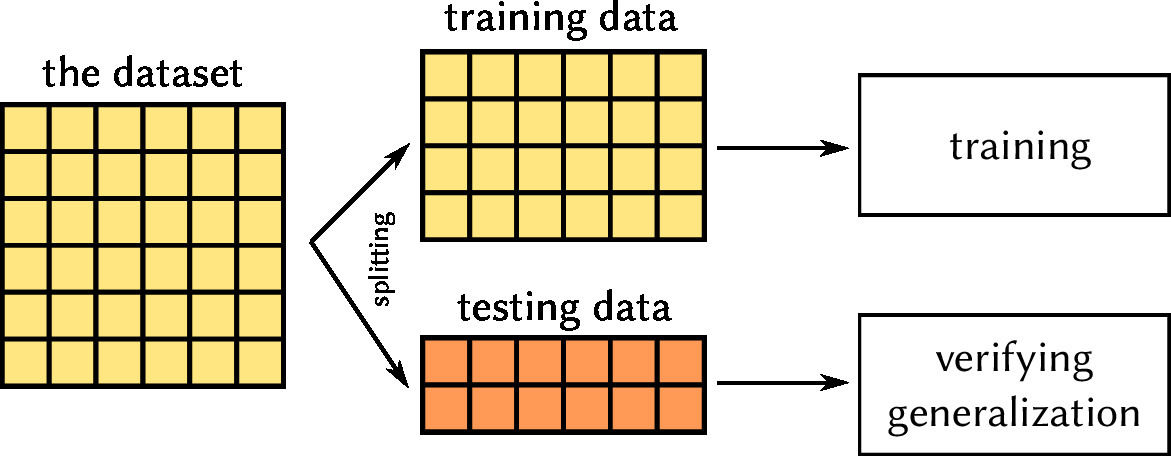



V Python-e môžeme na rozdelenie dátovej množiny použiť funkciu `train_test_split` z balíčka `sklearn`. Môžeme špecifikovať, aký podiel dát sa použije na testovanie a aký na tréning. Môžeme tiež použiť stratifikáciu (toto zabezpečí, že rozdelenie tried v tréningovej aj v testovacej množine zostane rovnaké ako v pôvodnej dátovej množine).



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, stratify=Y,
    # Rozdelenie dátovej množiny sa bežne robí náhodne. My v tomto príklade ale
    # chceme dostať zakaždým podobné výsledky, preto zafixujeme jadro pseudonáhodného
    # generátora pomocou argumentu random_state. Za bežných okolností by sme to nerobili.
    random_state=1
)

Následne môžeme zopakovať proces učenia – ibaže tento raz už pri ňom použijeme len tréningové dáta:



In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

Správnosť na trénignových dátach vieme samozrejme stále vyhodnotiť:



In [ ]:
y_train = model.predict(X_train)
acc = accuracy_score(Y_train, y_train)
print("Training data accuracy = {}".format(acc))

Môžeme však konečne zmerať aj správnosť na ešte nevidených testovacích dátach, na základe čoho vieme povedať, či model správne zovšeobecňuje:



In [ ]:
y_test = model.predict(X_test)
acc = accuracy_score(Y_test, y_test)
print("Testing data accuracy = {}".format(acc))